In [27]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
from IPython.display import clear_output
from pandas.tseries.offsets import MonthEnd

In [8]:
stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2].Symbol 
more_stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[3].Symbol
more_more_stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[3].Symbol_2 #obtains all stocks that have been in nitfy since 2010

In [9]:
stocks += '.NS'
more_stocks += '.NS'
more_more_stocks += '.NS'

In [10]:
stocks = stocks.to_list()
more_stocks = more_stocks.to_list()
more_more_stocks = more_more_stocks.to_list()

stocks = stocks + more_stocks + more_more_stocks
stocks_nd = []
[stocks_nd.append(x) for x in stocks if x not in stocks_nd]

stocks = stocks_nd

In [11]:
df = yf.download(stocks,start='2010-01-01')['Close'] # downloads the daily closing price of all the Nifty-50 sonsituent stocks from 1st January,2010 until present

[*********************100%***********************]  88 of 88 completed


5 Failed downloads:
['NESTLE.NS', 'INFRATEL.NS', 'STERLITE.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')
['RANBAXY.NS', 'CAIRN.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2023-07-17)')


In [12]:
df

,ABB.NS,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,...,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UNITECH.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,765.400024,913.599976,69.219017,111.349998,106.099998,347.149994,178.865005,92.695000,198.419998,866.025024,...,375.825012,255.750000,71.074997,966.099976,82.800003,116.233330,413.850006,156.105011,53.689999,118.354012
2010-01-05,763.450012,901.750000,70.820740,115.190002,105.300003,366.375000,179.429993,91.625000,202.559998,870.025024,...,375.924988,259.024994,72.532501,986.099976,84.099998,121.933334,416.899994,158.568756,54.480000,119.643013
2010-01-06,763.700012,907.599976,77.810081,120.900002,105.949997,353.924988,178.889999,90.745003,199.160004,856.575012,...,367.424988,260.299988,73.699997,987.299988,84.849998,119.766663,412.450012,155.362503,53.709999,122.291336
2010-01-07,782.299988,913.349976,74.598969,119.470001,105.800003,356.924988,177.065002,88.875000,200.570007,841.549988,...,357.200012,254.574997,75.532501,978.349976,84.150002,118.633331,407.799988,152.606262,52.799999,122.361641
2010-01-08,796.000000,912.150024,75.541611,119.330002,105.900002,355.725006,179.990005,89.635002,203.190002,827.625000,...,349.899994,261.274994,74.834999,990.299988,86.599998,117.900002,404.200012,150.311264,52.549999,120.533600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-11,4499.250000,1783.250000,2422.899902,729.900024,419.750000,5257.000000,3392.550049,736.400024,953.200012,4917.649902,...,3272.399902,1161.449951,3087.600098,8325.900391,1.350000,644.250000,277.549988,392.049988,17.200001,202.000000
2023-07-12,4528.450195,1789.650024,2387.899902,724.200012,421.549988,5252.049805,3406.750000,735.049988,950.000000,4878.450195,...,3259.899902,1159.400024,3096.500000,8220.500000,1.400000,643.849976,277.649994,391.850006,17.299999,201.949997
2023-07-13,4407.299805,1770.500000,2362.050049,717.200012,416.899994,5182.000000,3398.550049,724.400024,960.150024,4866.450195,...,3340.550049,1175.250000,3084.750000,8234.000000,1.400000,631.000000,278.049988,394.299988,17.150000,198.899994


In [13]:
ret_df = df.pct_change() #gets the percentage change per day
ret_df

,ABB.NS,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,...,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UNITECH.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.002548,-0.012971,0.023140,0.034486,-0.007540,0.055380,0.003159,-0.011543,0.020865,0.004619,...,0.000266,0.012805,0.020507,0.020702,0.015700,0.049039,0.007370,0.015783,0.014714,0.010891
2010-01-06,0.000327,0.006487,0.098691,0.049570,0.006173,-0.033982,-0.003009,-0.009604,-0.016785,-0.015459,...,-0.022611,0.004922,0.016096,0.001217,0.008918,-0.017769,-0.010674,-0.020220,-0.014134,0.022135
2010-01-07,0.024355,0.006335,-0.041269,-0.011828,-0.001416,0.008476,-0.010202,-0.020607,0.007080,-0.017541,...,-0.027829,-0.021994,0.024864,-0.009065,-0.008250,-0.009463,-0.011274,-0.017741,-0.016943,0.000575
2010-01-08,0.017512,-0.001314,0.012636,-0.001172,0.000945,-0.003362,0.016519,0.008551,0.013063,-0.016547,...,-0.020437,0.026318,-0.009234,0.012214,0.029115,-0.006181,-0.008828,-0.015039,-0.004735,-0.014940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-11,0.029659,-0.006380,0.005248,0.013609,0.000596,0.019124,0.014777,0.001224,-0.011255,0.004022,...,0.000138,0.012466,0.013807,-0.003047,0.000000,-0.024011,-0.016652,0.005385,0.008798,0.002481
2023-07-12,0.006490,0.003589,-0.014445,-0.007809,0.004288,-0.000942,0.004186,-0.001833,-0.003357,-0.007971,...,-0.003820,-0.001765,0.002882,-0.012659,0.037037,-0.000621,0.000360,-0.000510,0.005814,-0.000248
2023-07-13,-0.026753,-0.010700,-0.010825,-0.009666,-0.011031,-0.013338,-0.002407,-0.014489,0.010684,-0.002460,...,0.024740,0.013671,-0.003795,0.001642,0.000000,-0.019958,0.001441,0.006252,-0.008670,-0.015103


In [14]:
ret_df.index = pd.to_datetime(ret_df.index)
mtl_ret = (ret_df + 1).resample('M').prod() #converts the data to returns for the month (relative to price at the start of the month)

In [15]:
mtl_ret

,ABB.NS,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,...,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UNITECH.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,1.059577,0.954138,0.981510,1.069062,0.959472,0.982212,1.035530,0.909326,1.033868,1.009035,...,0.979445,0.950635,1.055857,0.962633,0.897343,0.891311,0.837864,0.933915,0.928478,1.038020
2010-02-28,0.979778,1.058965,1.097800,1.132140,1.050589,1.001540,0.977189,1.082869,1.096324,1.040024,...,1.034773,0.916041,1.163469,1.118333,0.968371,0.974260,1.154578,1.045605,0.949248,0.942388
2010-03-31,1.044551,1.030278,0.965269,1.171774,1.120617,1.068155,1.126468,1.051109,1.038906,1.108464,...,1.024744,0.957625,1.054030,1.110379,1.022933,0.985469,1.175097,1.043469,1.082840,1.086032
2010-04-30,0.954699,0.951632,1.197679,0.935917,1.010013,1.075183,1.019594,0.992547,1.087096,1.038987,...,0.980465,0.907514,1.156824,0.842317,1.154891,1.140751,0.911787,0.949855,1.114949,1.133644
2010-05-31,1.084048,0.904425,0.964803,0.942422,0.899215,0.946328,1.003512,0.895511,0.970354,1.055414,...,0.970800,0.821751,1.043560,0.947571,0.854118,1.070212,0.890314,0.997245,1.008052,0.929957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,1.045938,0.962753,1.283462,1.066588,1.068547,0.979383,0.976262,1.119611,1.017060,1.061059,...,0.967717,1.001454,1.059887,1.049695,0.718750,1.033780,1.022732,0.943677,0.862464,1.085123
2023-04-30,1.015690,1.057372,1.099689,1.078177,1.084667,1.047044,1.050948,1.190890,1.001747,1.140859,...,1.004164,0.929074,1.050479,0.991348,1.173913,1.031561,1.017854,1.054073,1.043189,0.926973
2023-05-31,1.207127,1.008140,1.295280,1.084471,1.068348,1.023983,1.100126,1.067423,1.063779,1.030506,...,1.021822,1.089724,1.068664,1.041535,1.000000,0.925436,0.996241,1.048442,1.031847,0.991360


In [16]:
def performers(date,lookback_period,holding_period,n):
    try:
        mtl_lb = mtl_ret.rolling(lookback_period).apply(np.prod).dropna() #cumulative movement in the stock price over the previous "lookback_period" months
        top = mtl_lb.loc[date].nlargest(n) #gets the n best performing stocks for the given 'lookback_period' months #ERROR CORRECTED : mtl_lb instead of mtl_12
        bottom = mtl_lb.loc[date].nsmallest(n)
        relevant_ret_top = mtl_ret[top.name:][1:1+holding_period][top.index].rolling(holding_period).apply(np.prod)
        relevant_ret_bottom = mtl_ret[bottom.name:][1:1+holding_period][bottom.index].rolling(holding_period).apply(np.prod)
        return (relevant_ret_top).mean(axis = 1).values[holding_period-1],(relevant_ret_bottom).mean(axis = 1).values[holding_period-1] #returns the average returns for the top 'n' stocks given a holding period
    except KeyError:
        return 1,1

In [17]:
def getPortfolioReturns(lookback_period,holding_period,n):
    
    momentum_returns_winners = []
    momentum_returns_losers = []
    i=0
    for date in mtl_ret.index[:114:holding_period]: 
        momentum_returns_winners.append(performers(date,lookback_period,holding_period,n)[0])
        momentum_returns_losers.append(performers(date,lookback_period,holding_period,n)[1])
        clear_output(wait=True)
        print("[   Datapoint: %0.2f percent done   ]" % (i*holding_period/115*100))
        i+=1
        
    clear_output(wait=True)
    return round(pd.Series(momentum_returns_winners).prod(),2),round(pd.Series(momentum_returns_losers).prod(),2)

In [20]:
#compilation of results obtained by taking J = 1 and varying holding period
returns = []

for K in [1,3,6,12,24,36,48,60]:
    returns.append(getPortfolioReturns(1,K,10))
    
print(returns)

[(1.33, 1.83), (1.97, 1.2), (2.85, 0.72), (1.89, 0.74), (2.69, 1.1), (5.96, 1.61), (8.21, 2.02), (3.13, 4.16)]


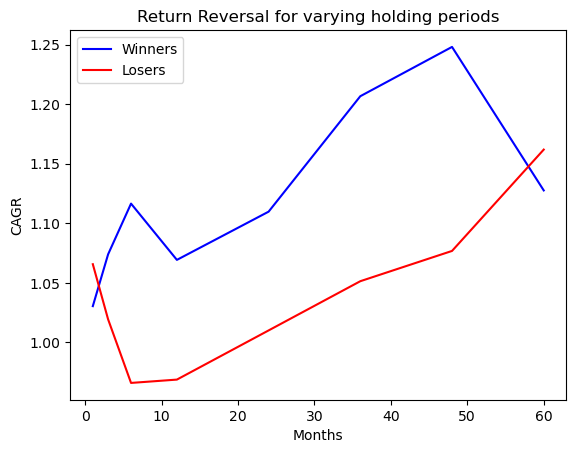

In [29]:
import matplotlib.pyplot as plt

# Coordinates of the points
points = [(1.33, 1.83), (1.97, 1.2), (2.85, 0.72), (1.89, 0.74), (2.69, 1.1), (5.96, 1.61), (8.21, 2.02), (3.13, 4.16)]

# Separate the x and y coordinates
x_values = [1,3,6,12,24,36,48,60]
y1_values = [math.exp(math.log(point[0])/9.5) for point in points]
y2_values = [math.exp(math.log(point[1])/9.5)  for point in points]

# Create the plot
plt.plot(x_values, y1_values, 'b-', label='Winners')
plt.plot(x_values, y2_values, 'r-', label='Losers')

# Set the x and y axis labels
plt.xlabel('Months')
plt.ylabel('CAGR')

# Set the plot title
plt.title('Return Reversal for varying holding periods')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [18]:
#result obtained on just holding Nifty-50 for the given duration

relevant_returns = mtl_ret[:114].rolling(114).apply(np.prod)
nifty_returns = relevant_returns.mean(axis = 1).values[113]
print(round(nifty_returns,2))

4.76
